In [4]:
import pandas as pd
import re

In [38]:
data = pd.read_csv("train.csv")

In [39]:
data.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [40]:
data.tail()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0
1204,2021-01-26,화,2983,69,183,551,362.0,모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...,쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...,(New)할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기,1015.0,480.0


In [12]:
dinner = data["석식메뉴"]

In [13]:
dinner.head()

0    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...
1    콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...
2    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기...
3    미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포...
4    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...
Name: 석식메뉴, dtype: object

In [14]:
dinner[0]

'쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침  포기김치 (김치:국내산) '

In [16]:
a = dinner[0].rstrip()
a.split('  ')

['쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장', '자반고등어구이', '두부조림', '건파래무침', '포기김치 (김치:국내산)']

In [17]:
# unique한 메뉴 구하기
def get_unique_menu(menu):
    menu_list = []
    for i in range(len(menu)):
        # menu[i].rstrip().split(' ') # 오른쪽 공백제거 & 공백으로 나누기
        menu_list.append(menu[i].rstrip().split(' '))
    menu_list = sum(menu_list, [])
    return set(menu_list)

In [18]:
get_unique_menu(dinner)

{'',
 '새송이버섯조림',
 '망고주스',
 '야채샐러드/과일',
 '매운떡볶이*순대찜',
 '황태해장국',
 '꽃삼겹김치찜',
 '(닭:국내산)',
 '해물짬뽕',
 '쇠고기모둠장조림',
 '오이생채',
 '크랜베리단호박샐러드',
 '콩조림',
 '꽁채캔김치조림',
 '과일플레인샐러드',
 '쨔샤이무침',
 '해물까스*탈탈소스',
 '김계란말이',
 '삼치튀김*데리야끼',
 '감자튀김/무피클',
 '스파게티/크림스프',
 '매운어묵볶음',
 '옥수수맛살전',
 '쇠고기볶음밥',
 '오이도라지무침',
 '비프스파게티',
 '스태프핫도그',
 '(New)명란연근전',
 '상추파무침',
 '수제고로케',
 '*도시락김',
 '감자튀김*케찹',
 '근대국',
 '어묵곤약볶음',
 '모둠버섯볶음',
 '가지마파두부',
 '파김치',
 '콘치즈구이',
 '김자반',
 '날치알볶음밥',
 '묵은지닭찜',
 '북어국',
 '조각사과',
 '주꾸미무침',
 '삼계국밥',
 '연근튀김*칠리소스',
 '시금치흑임자샐러드',
 '깐풍육',
 '훈제오리볶음',
 '궁중떡찜',
 '투움바스파게티',
 '브로컬리초장',
 '오렌지주스',
 '마카로니치즈범벅',
 '동그랑땡전',
 '치즈시즈닝치킨',
 '햄계란말이',
 '풋고추튀김',
 '돈육모듬장조림',
 '갈치무조림',
 '김말이,고추튀김',
 '흑임자샐러드',
 '떡만두국',
 '버섯들깨탕',
 '미니햄버거',
 '해물까스&타르타르D',
 '(쌀:국내산,소고기:호주)',
 '미역초무침',
 '모둠소시지구이',
 '통새우김밥',
 '들깨미역국',
 '무비트생채(초절이)',
 '콩나물파채무침',
 '옹심이감자국',
 '계란찜',
 '양송이스프',
 '등갈비오븐구이',
 '수제미니햄버거',
 '카레감자채볶음',
 '버섯탕수',
 '어묵우동',
 '백종원의',
 '맑은콩나물국',
 '꽁치구이',
 '채소튀김*장',
 '콩나물국',
 '삼치양념찜',
 '김치주먹밥',
 '늙은호박전',
 '팝콘치킨*데리야끼소스',
 '황태국',
 '콩나

In [ ]:
# 사실 단어사전 만들면 됨. (ML)

## 시각화

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# 사용자 운영체제 확인
import os
os.name

# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

### 요일에 따른 식수인원

<AxesSubplot:xlabel='요일', ylabel='중식계'>

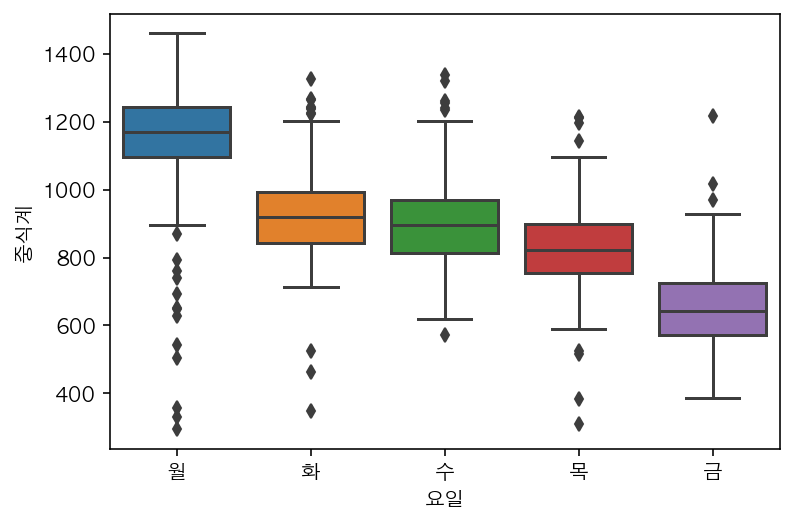

In [42]:
sns.boxplot(data=data, x="요일", y="중식계")

<AxesSubplot:xlabel='요일', ylabel='석식계'>

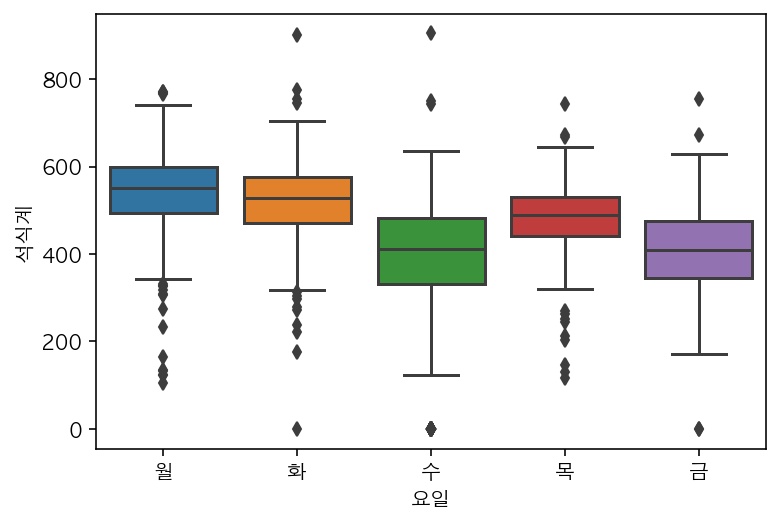

In [43]:
sns.boxplot(data=data, x="요일", y="석식계")

In [44]:
# data 자료형 확인 
data.dtypes

일자                 object
요일                 object
본사정원수               int64
본사휴가자수              int64
본사출장자수              int64
본사시간외근무명령서승인건수      int64
현본사소속재택근무자수       float64
조식메뉴               object
중식메뉴               object
석식메뉴               object
중식계               float64
석식계               float64
dtype: object

In [45]:
data["일자"] = pd.to_datetime(data["일자"])
data.dtypes

일자                datetime64[ns]
요일                        object
본사정원수                      int64
본사휴가자수                     int64
본사출장자수                     int64
본사시간외근무명령서승인건수             int64
현본사소속재택근무자수              float64
조식메뉴                      object
중식메뉴                      object
석식메뉴                      object
중식계                      float64
석식계                      float64
dtype: object

In [46]:
data['년'] = data["일자"].dt.year
data['월'] = data["일자"].dt.month
data['일'] = data["일자"].dt.day

data.head() # 년/월/일 column 추가됨

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,년,월,일
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,2,3
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016,2,4
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,2,5


<AxesSubplot:xlabel='월', ylabel='중식계'>

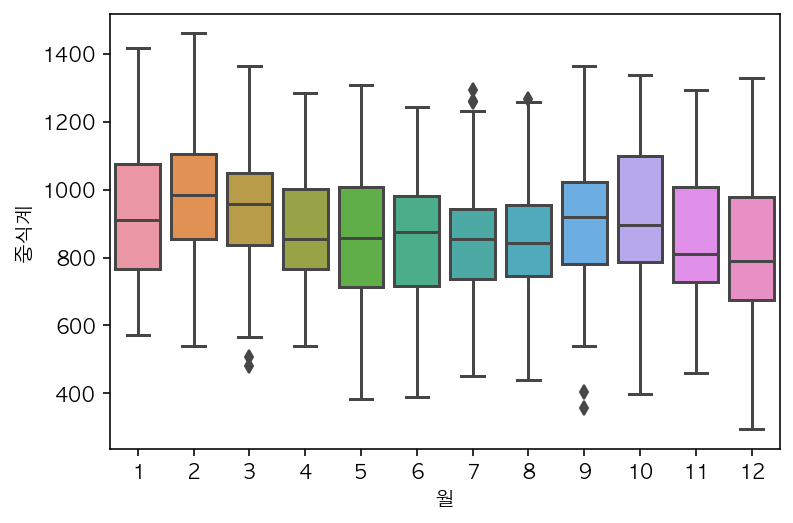

In [47]:
# 월별 중식계
sns.boxplot(data=data, x="월", y="중식계") 

<AxesSubplot:xlabel='년', ylabel='중식계'>

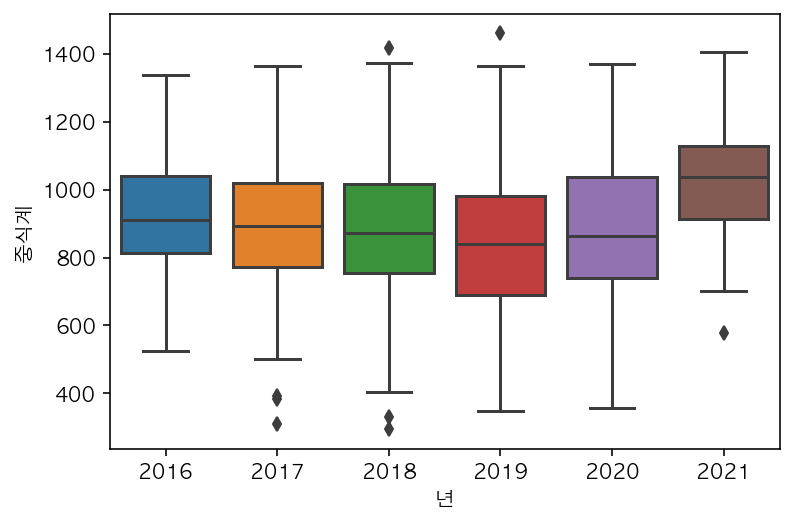

In [48]:
sns.boxplot(data=data, x="년", y="중식계") 

In [ ]:
# 2021년은 data가 적기에 (sample수 < 30) ...?

Text(0.5, 1.0, 'line graph')

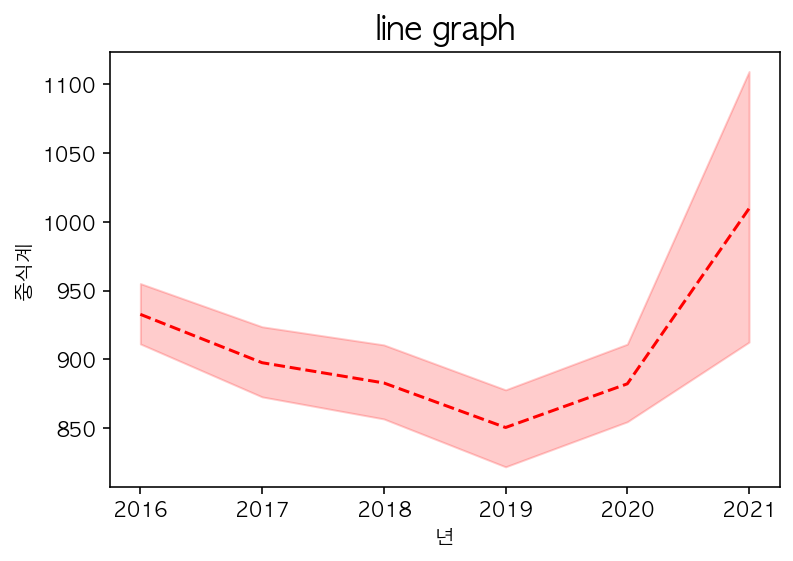

In [59]:
sns.lineplot(data=data, x="년", y="중식계", color='r', linestyle="--")
plt.title("line graph", fontsize=16)

<AxesSubplot:xlabel='월', ylabel='중식계'>

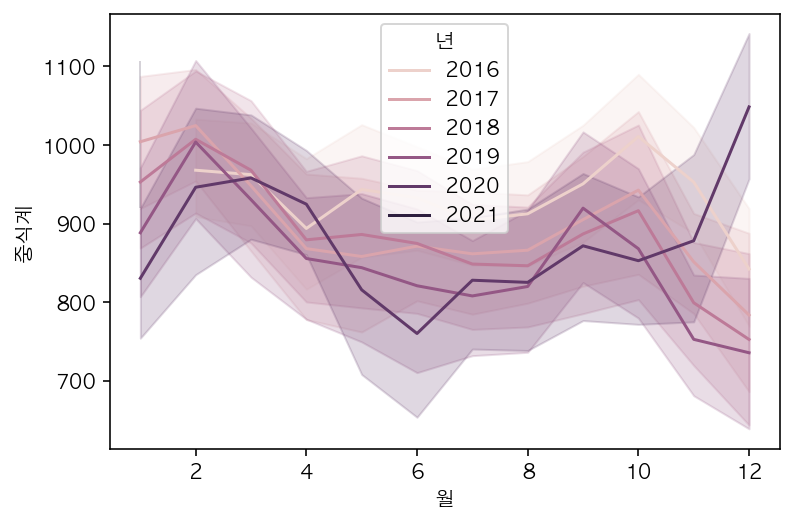

In [52]:
sns.lineplot(data=data, x="월", y="중식계", hue="년")

### regression plot
https://dining-developer.tistory.com/30

<AxesSubplot:xlabel='본사출장자수', ylabel='중식계'>

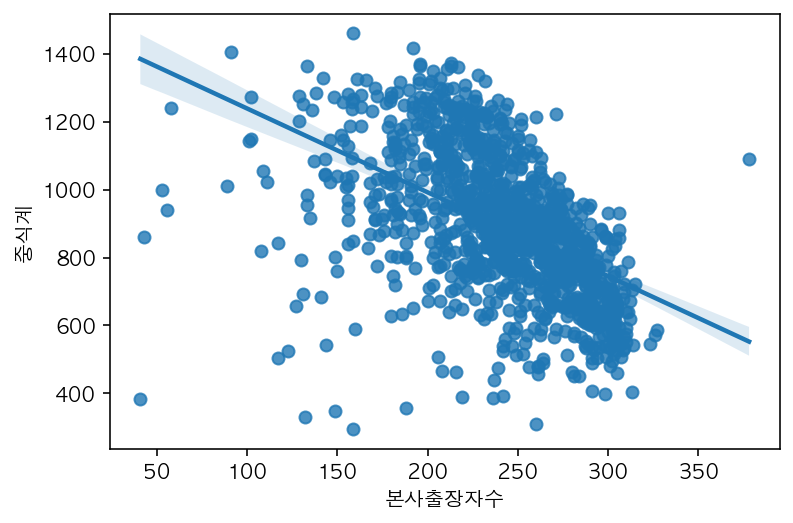

In [56]:
sns.regplot(x="본사출장자수", y="중식계", data=data)

<AxesSubplot:xlabel='본사시간외근무명령서승인건수', ylabel='중식계'>

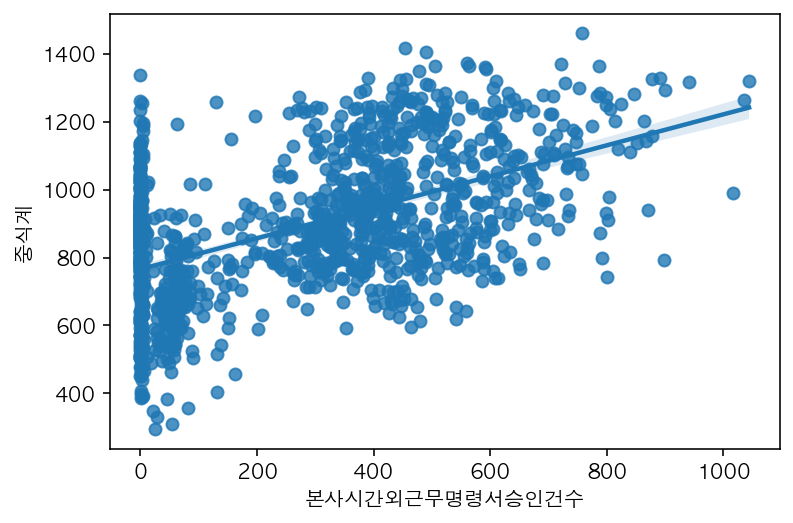

In [57]:
sns.regplot(x="본사시간외근무명령서승인건수", y="중식계", data=data)